Використай цей шаблон в роботі з датасетом. Ти можеш додавати комірки за потреби, але не змінюй структуру і послідовність питань. Обмежся функціями з наведених бібліотек.

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colours_list = ['green', 'blue', 'purple']
line_list = ['-', '--', ':']

Переглянь список .json файлів, доступних за адресою https://github.com/prust/wikipedia-movie-data/tree/master. Відкрий будь-який файл, що містить у своїй назві рік і ознайомся з його структурою. Тепер сформуй список файлів, які ти будеш завантажувати. Для формування послідовності слід використати функцію numpy.arange. Довжина послідовності має становити не менше 5 датасетів(наприклад з 1960 по 2000  рік включно). Повну адресу сформуй через конкатенацію рядків.

In [3]:
# Function to generate list of links
def links_list(url: str, start_year: int, end_year: int, step: int = 1) -> list[str]:
    years = np.arange(start=start_year, stop=end_year, step=step, dtype=int)
    links: list[str] = []
    for year in years:
        links.append(f'{url}/movies-{year}s.json')
    return links

end_point = 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master'

file_links = links_list(end_point, 1900, 2020 + 1, 10)
print(file_links)

['https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1900s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1910s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1920s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1930s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1940s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1950s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1960s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1970s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1980s.json', 'https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-1990s.json',

Тепер послідовність дій наступна. Слід пройти по всім обраним тобою файлам, прочитати кожен як json об'єкт. Позбутись зайвих стовпців: ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height']. Залишити лише повні рядки(рядки без пропущених значень). Об'єднати інформацію з усіх файлів в єдиний датасет.

In [4]:
df: pd.DataFrame = pd.DataFrame()
# Load, clean and concatenate data from each file
for file_link in file_links:
    data = pd.read_json(file_link)
    data = data.drop(['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height'], axis=1)
    df = pd.concat([df, data], ignore_index=True)

In [5]:
df.head()

,title,year,cast,genres
0,After Dark in Central Park,1900,[],[]
1,Boarding School Girls' Pajama Parade,1900,[],[]
2,Buffalo Bill's Wild West Parad,1900,[],[]
3,Caught,1900,[],[]
4,Clowns Spinning Hats,1900,[],[Silent]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36273 entries, 0 to 36272
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   36273 non-null  object
 1   year    36273 non-null  int64 
 2   cast    36273 non-null  object
 3   genres  36273 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
print(f'Shape of combined dataframe: {df.shape}')
print(f'NaN in each column:\n{df.isna().sum()}')

Shape of combined dataframe: (36273, 4)
NaN in each column:
title     0
year      0
cast      0
genres    0
dtype: int64


In [8]:
df_clean = df

In [9]:
# Replace empty lists with NaN and drop rows with any NaN
df_clean['cast'] = df_clean['cast'].apply(lambda x: None if len(x) == 0 else x)
df_clean['genres'] = df_clean['genres'].apply(lambda x: None if len(x) == 0 else x)
df_clean = df_clean.dropna().reset_index(drop=True)
print(f'Shape of cleaned dataframe: {df_clean.shape}')
print(f'NaN in each column after cleaning:\n{df_clean.isna().sum()}')

Shape of cleaned dataframe: (35100, 4)
NaN in each column after cleaning:
title     0
year      0
cast      0
genres    0
dtype: int64


Перевір розмір фінального датасету. він має включати 4(чотири) стовпчика. Кількість рядків залежить від обраної кількості файлів. Зьережи собі копію у вигляді csv або json файлу. Це убезпечить тебе від форс-мажорів.

In [10]:
df_clean

,title,year,cast,genres
0,Feeding Sea Lions,1900,[Paul Boyton],"[Short, Silent]"
1,"The Wonder, Ching Ling Foo",1900,[Ching Ling Foo],[Short]
2,Alice in Wonderland,1903,[May Clark],"[Fantasy, Silent]"
3,The Automobile Thieves,1906,"[J. Stuart Blackton, Florence Lawrence]","[Short, Crime, Drama, Silent]"
4,Humorous Phases of Funny Faces,1906,[J. Stuart Blackton],"[Short, Animated, Silent]"
...,...,...,...,...
35095,Wonka,2023,"[Timothée Chalamet, Keegan-Michael Key, Sally ...","[Fantasy, Musical]"
35096,Aquaman and the Lost Kingdom,2023,"[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",[Superhero]
35097,Untitled Ghostbusters: Afterlife sequel,2023,"[Mckenna Grace, Carrie Coon, Finn Wolfhard, Pa...","[Comedy, Supernatural]"
35098,Rebel Moon,2023,"[Sofia Boutella, Charlie Hunnam, Ray Fisher, D...",[Science Fiction]


In [11]:
df_clean.to_json(path_or_buf='datasets/wikipedia-movie-data/df_backup.json', force_ascii=False, indent=4, orient='records')

Для json файлу не варто використовувати метод describe. Файл містить вкладені структури. Перевір вміст перших рядосків і використай метод info.
df_clean.head()

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35100 entries, 0 to 35099
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   35100 non-null  object
 1   year    35100 non-null  int64 
 2   cast    35100 non-null  object
 3   genres  35100 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


Тепер слід попрацювати з жанрами. Віднайди топ 10 жанрів за кількістю фільмів. Побудуй стовпчикову так кругову діаграму, а також виведи на екран підсумукову таблицю.

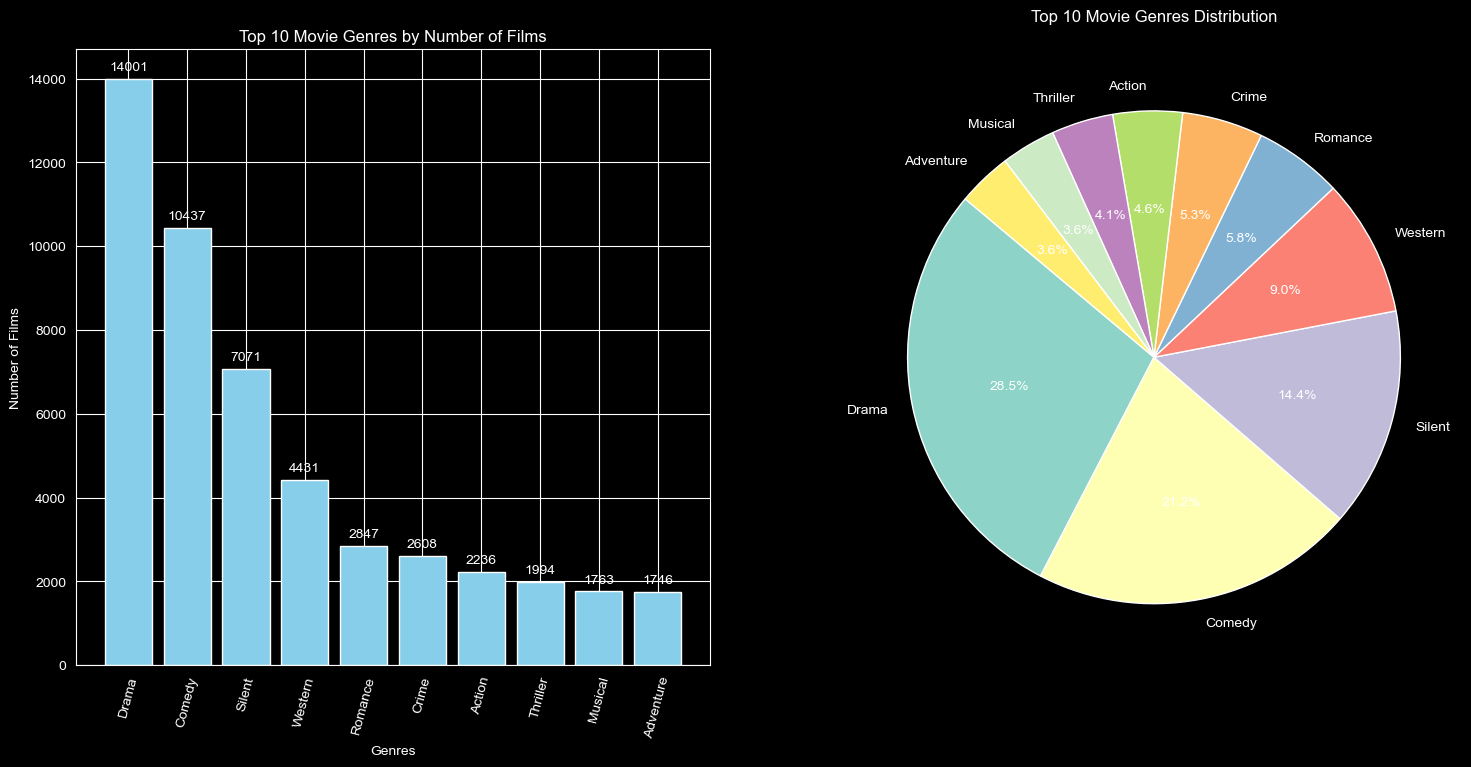

In [13]:
# Getting Top 10 genres
top_genres = df_clean.explode('genres')
top_genres = top_genres.groupby('genres').size().reset_index(name='counts')
top_genres = top_genres.sort_values(by='counts', ascending=False).reset_index(drop=True).head(10)
genres_list = top_genres['genres'].to_list()    # Sorted list of top-10 genres. For later use.
# Plot bar chart for top 10 genres
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plt.sca(ax[0])
plt.bar(data=top_genres, x=top_genres['genres'], height=top_genres['counts'], color='skyblue')
for i in enumerate(top_genres['genres']):
    plt.text(i[0], top_genres['counts'][i[0]] + 200, str(top_genres['counts'][i[0]]), ha='center')
plt.title('Top 10 Movie Genres by Number of Films')
plt.xlabel('Genres')
plt.ylabel('Number of Films')
plt.xticks(rotation=75)
# Plot pie chart for top 10 genres
plt.sca(ax[1])
plt.pie(top_genres['counts'], labels=top_genres['genres'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Movie Genres Distribution', pad=20)
plt.show()

In [14]:
top_genres.head(10)

,genres,counts
0,Drama,14001
1,Comedy,10437
2,Silent,7071
3,Western,4431
4,Romance,2847
5,Crime,2608
6,Action,2236
7,Thriller,1994
8,Musical,1763
9,Adventure,1746


Тепер вибери 3 найпопулярніших жанри і подивись, як змінювалась іх популярність впродовж обраного тобою часового періода. Для цього підрахуй кількість фільмів в кожному жанрі за кожен рік спостереження. Виведи результат у вигляді лінійного графіка.

Top 3: Drama, Comedy, Silent

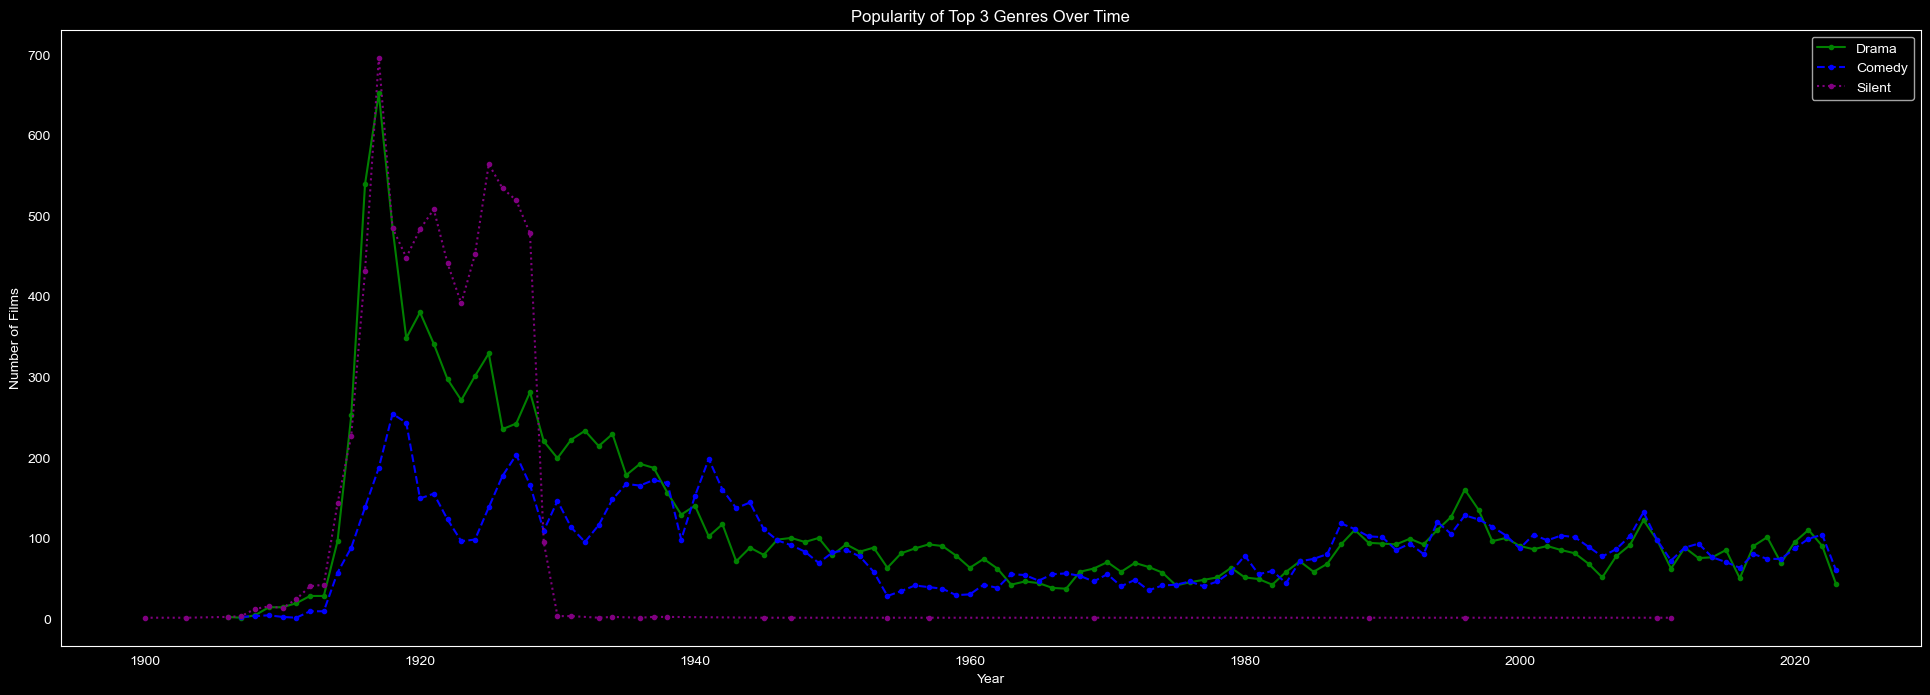

In [15]:
# Getting Top 3 genres
df_plot_top3 = df_clean.explode('genres').reset_index(drop=True)
df_plot_top3 = df_plot_top3[df_plot_top3['genres'].isin(['Drama', 'Comedy', 'Silent'])].groupby('year')
df_plot_top3 = df_plot_top3['genres'].value_counts().reset_index(name='counts')
genres_plot_list = map(lambda x, y, z: {'genre': x, 'colour': y, 'line': z}, genres_list[:3], colours_list, line_list)  # Mapping to plot through for loop
# Plotting the line graph for Top 3 genres over time
plt.figure(figsize=(24, 8))
for i in genres_plot_list:
    plt.plot(df_plot_top3[(df_plot_top3['genres'] == f'{i["genre"]}')]['year'],
             df_plot_top3[(df_plot_top3['genres'] == f'{i["genre"]}')]['counts'],
             marker='.',
             linestyle=f'{i["line"]}',
             color=f'{i["colour"]}',
             label=f'{i["genre"]}')
plt.title('Popularity of Top 3 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.legend()
plt.grid()
plt.show()

Тепер слід попрацювати з акторами. Віднайди топ 10 акторів за кількістю фільмів. Побудуй стовпчикову так кругову діаграму, а також виведи на екран підсумукову таблицю.

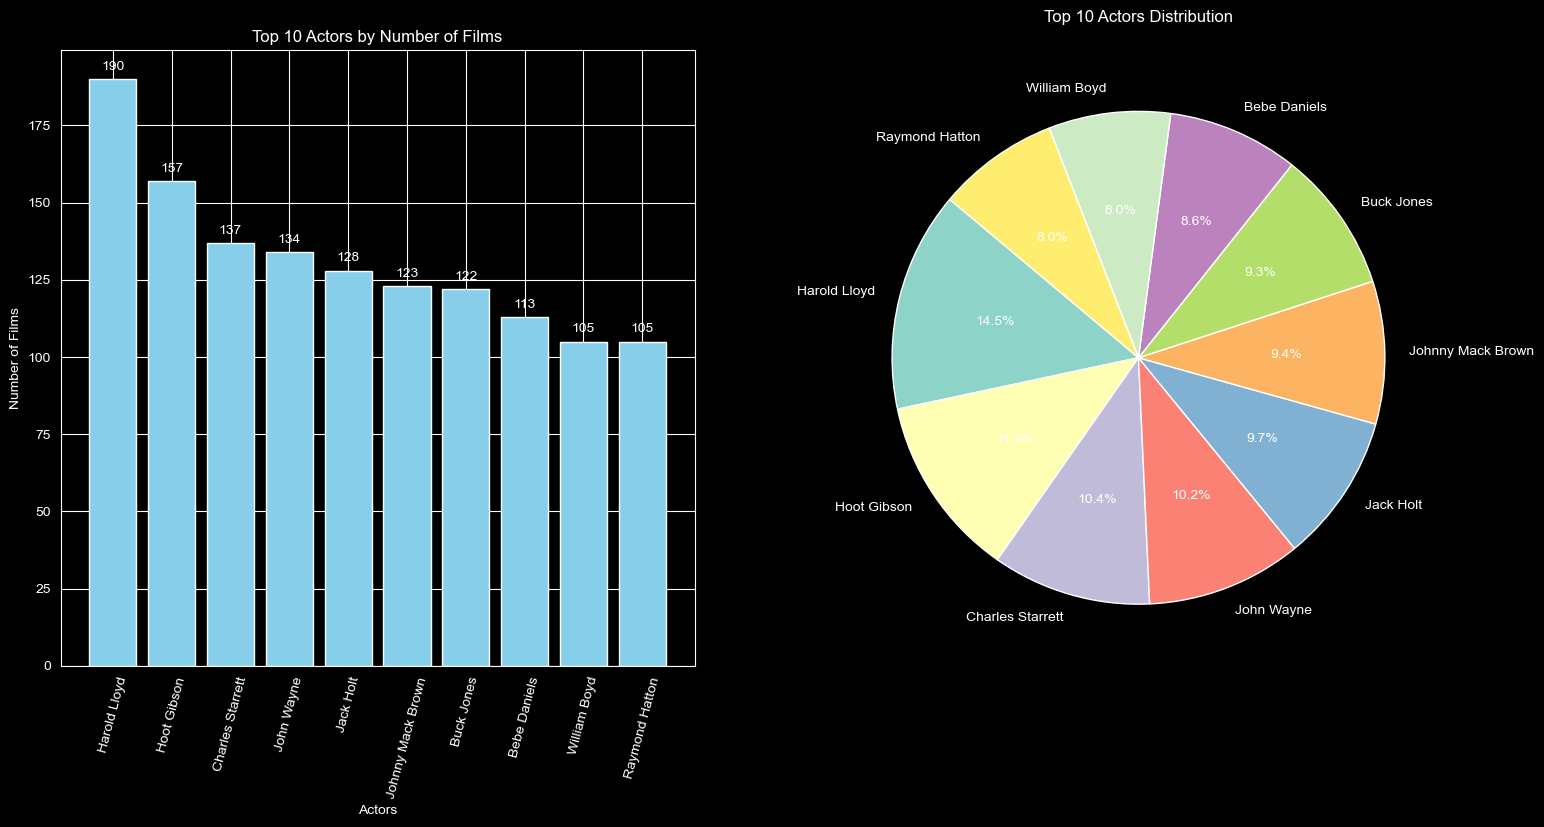

In [16]:
top_actors = df_clean.copy()
top_actors = top_actors.explode('cast')
top_actors = top_actors.groupby('cast').size().reset_index(name='counts')
top_actors = top_actors.sort_values(by='counts', ascending=False).reset_index(drop=True).head(10)
actors_list = top_actors['cast'].to_list()  # Sorted list of top-10 actors. For later use.
# Plot bar chart for top 10 actors
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
plt.sca(ax[0])
plt.bar(data=top_actors, x=top_actors['cast'], height=top_actors['counts'], color='skyblue')
for i in enumerate(top_actors['cast']):
    plt.text(i[0], top_actors['counts'][i[0]] + 3, str(top_actors['counts'][i[0]]), ha='center')
plt.title('Top 10 Actors by Number of Films')
plt.xlabel('Actors')
plt.ylabel('Number of Films')
plt.xticks(rotation=75)
# Plot pie chart for top 10 actors
plt.sca(ax[1])
plt.pie(top_actors['counts'], labels=top_actors['cast'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Actors Distribution', pad=20)
plt.show()

In [17]:
top_actors.head(10)
print(f'Top 10 actors list: {actors_list}\nTop 10 actors table: \n{top_actors.head(15)}')
[{'index': 0, 'cast': 'Harold Lloyd', 'counts': 190}, {'index': 1, 'cast': 'Hoot Gibson', 'counts': 157}]

Top 10 actors list: ['Harold Lloyd', 'Hoot Gibson', 'Charles Starrett', 'John Wayne', 'Jack Holt', 'Johnny Mack Brown', 'Buck Jones', 'Bebe Daniels', 'William Boyd', 'Raymond Hatton']
Top 10 actors table: 
                cast  counts
0       Harold Lloyd     190
1        Hoot Gibson     157
2   Charles Starrett     137
3         John Wayne     134
4          Jack Holt     128
5  Johnny Mack Brown     123
6         Buck Jones     122
7       Bebe Daniels     113
8       William Boyd     105
9     Raymond Hatton     105


[{'index': 0, 'cast': 'Harold Lloyd', 'counts': 190},
 {'index': 1, 'cast': 'Hoot Gibson', 'counts': 157}]

Тепер вибери 3 найпопулярніших актори і подивись, як змінювалась іх популярність впродовж обраного тобою часового періода. Для цього підрахуй кількість фільмів для кожного актора за кожен рік спостереження. Виведи результат у вигляді лінійного графіка.

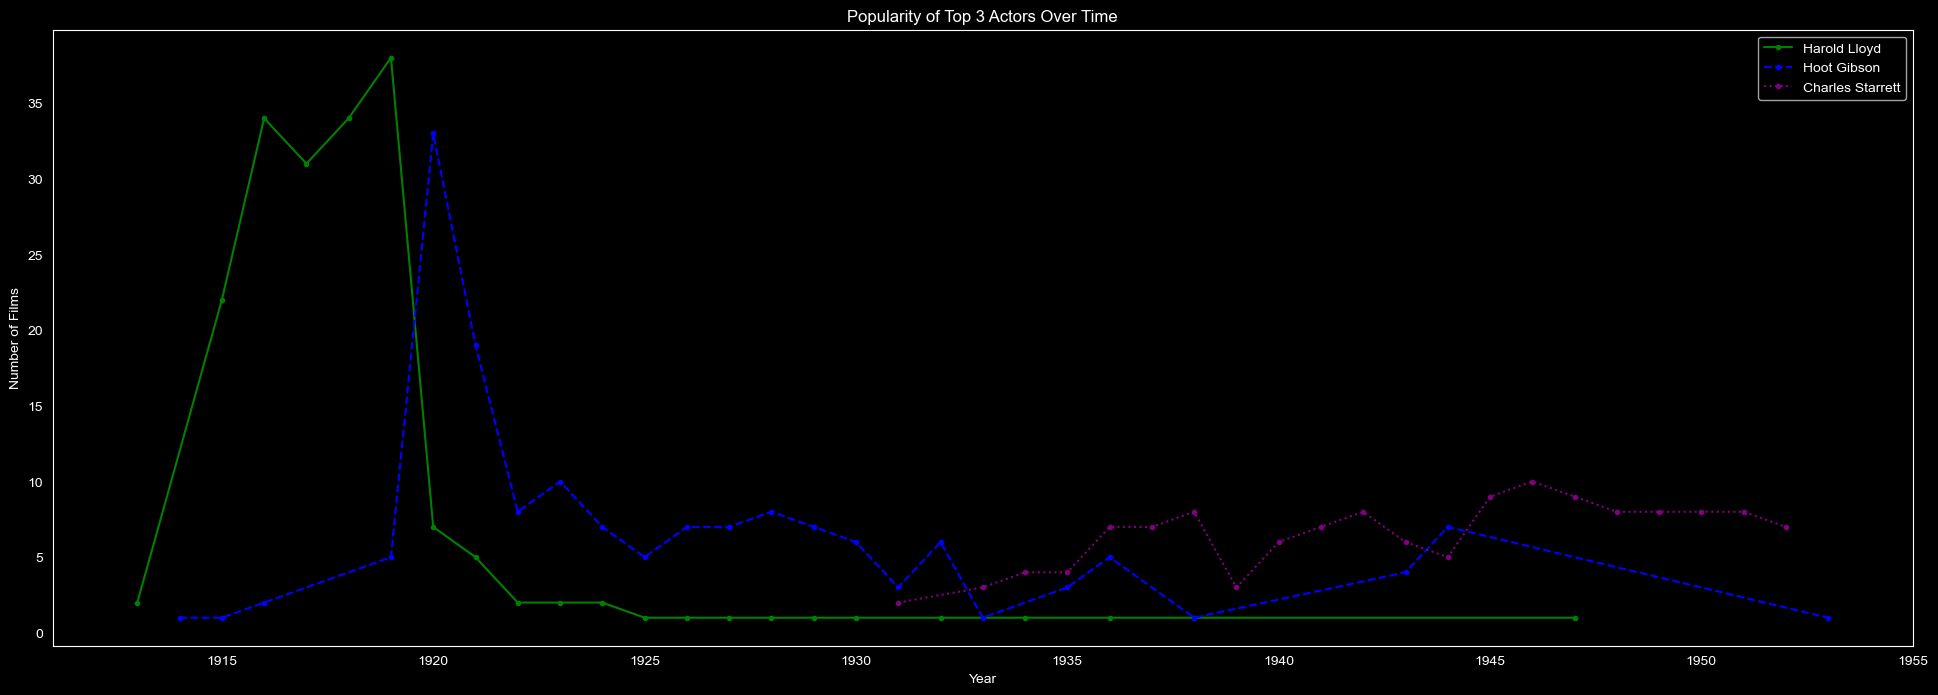

In [18]:
df_plot_actors = df_clean.explode('cast').reset_index(drop=True)
df_plot_actors = df_plot_actors[df_plot_actors['cast'].isin(actors_list[:3])].groupby('year')
df_plot_actors = df_plot_actors['cast'].value_counts().reset_index(name='counts')
actors_plot_list = map(lambda x, y, z: {'actor': x, 'colour': y, 'line': z}, actors_list[:3], colours_list, line_list)  # Mapping to plot through for loop
# Plotting the line graph for Top 3 actors over time
plt.figure(figsize=(24, 8))
for i in actors_plot_list:
    plt.plot(df_plot_actors[(df_plot_actors['cast'] == f'{i["actor"]}')]['year'],
             df_plot_actors[(df_plot_actors['cast'] == f'{i["actor"]}')]['counts'],
             marker='.',
             linestyle=f'{i["line"]}',
             color=f'{i["colour"]}',
             label=f'{i["actor"]}')
plt.title('Popularity of Top 3 Actors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.legend()
plt.grid()
plt.show()

In [19]:
df_plot_actors.head(10)

,year,cast,counts
0,1913,Harold Lloyd,2
1,1914,Hoot Gibson,1
2,1915,Harold Lloyd,22
3,1915,Hoot Gibson,1
4,1916,Harold Lloyd,34
5,1916,Hoot Gibson,2
6,1917,Harold Lloyd,31
7,1918,Harold Lloyd,34
8,1919,Harold Lloyd,38
9,1919,Hoot Gibson,5


*Бонусне завдання*
Зосередьтеся лише на 10 найпопулярніших акторах. Порахуй, як часто кожен актор з'являється в фільмі, що належить до категорії топ-3 найпопулярніших жанри, а як часто в фільмі, що не включає топовий жанр.  Оціни пропорції для кожного актора у вигляді стовпчикової дфаграми та у вигляді таблиці, де вказано також відсоток фільмів в топ жанрах.

In [20]:
# Top 10 actors
df_bonus = df_clean.explode('cast').reset_index(drop=True)
df_bonus = df_bonus[df_bonus['cast'].isin(actors_list)].reset_index(drop=True)
# Total films per actor
df_bonus_total = df_bonus.groupby('cast').size().reset_index(name='total_films')
df_bonus_total = df_bonus_total.sort_values(by='total_films', ascending=False).reset_index(drop=True)
# Films in top-3 genres per actor
df_bonus_top3 = df_bonus
df_bonus_top3 = df_bonus_top3.explode('genres').reset_index(drop=True)
df_bonus_top3 = df_bonus_top3[df_bonus_top3['genres'].isin(genres_list[:3])].reset_index(drop=True)
df_bonus_top3 = df_bonus_top3.groupby('cast').nunique()  # Keep unique films per actor
df_bonus_top3 = df_bonus_top3['title'].sort_values(ascending=False).reset_index().rename(columns={'title': 'top3_genre_films'})
# Merging total films and top-3 genre films
df_final = pd.merge(df_bonus_total, df_bonus_top3, on='cast', how='left')
df_final['films_not_in_top3'] = df_final['total_films'] - df_final['top3_genre_films']    # Films not in top-3 genres

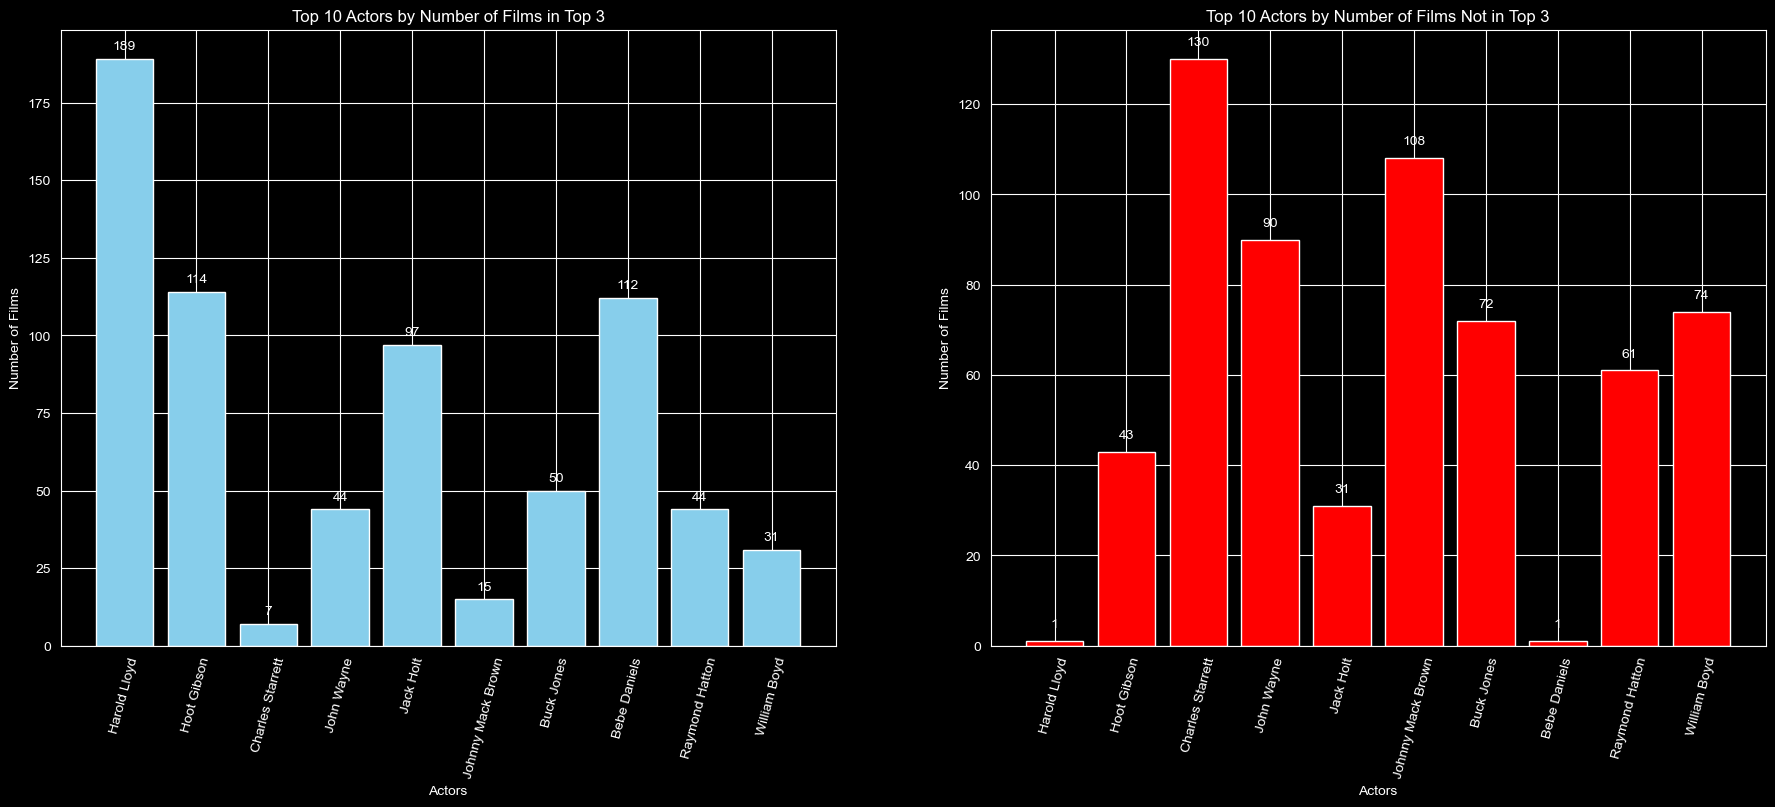

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
plt.sca(ax[0])
plt.bar(df_final['cast'], df_final['top3_genre_films'], label='Top 3 Genres', color='skyblue')
for i in enumerate(df_final['cast']):
    plt.text(i[0], df_final['top3_genre_films'][i[0]] + 3, str(df_final['top3_genre_films'][i[0]]), ha='center')
plt.title('Top 10 Actors by Number of Films in Top 3')
plt.xlabel('Actors')
plt.ylabel('Number of Films')
plt.xticks(rotation=75)
plt.sca(ax[1])
plt.bar(df_final['cast'], df_final['films_not_in_top3'], label='All Other Genres', color='red')
for i in enumerate(df_final['cast']):
    plt.text(i[0], df_final['films_not_in_top3'][i[0]] +3, str(df_final['films_not_in_top3'][i[0]]), ha='center')
plt.title('Top 10 Actors by Number of Films Not in Top 3')
plt.xlabel('Actors')
plt.ylabel('Number of Films')
plt.xticks(rotation=75)
plt.show()

In [22]:
df_final['share_in_top3'] = (df_final['top3_genre_films'] / df_final['total_films'] * 100).round(2)
df_final[['cast', 'total_films', 'share_in_top3', 'top3_genre_films', 'share_in_top3']].head(10)

,cast,total_films,share_in_top3,top3_genre_films,share_in_top3
0,Harold Lloyd,190,99.47,189,99.47
1,Hoot Gibson,157,72.61,114,72.61
2,Charles Starrett,137,5.11,7,5.11
3,John Wayne,134,32.84,44,32.84
4,Jack Holt,128,75.78,97,75.78
5,Johnny Mack Brown,123,12.20,15,12.20
6,Buck Jones,122,40.98,50,40.98
7,Bebe Daniels,113,99.12,112,99.12
8,Raymond Hatton,105,41.90,44,41.90
9,William Boyd,105,29.52,31,29.52
